In [1]:
unique_colors = [
    '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
    '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff',
    '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1',
    '#000075', '#808080', '#ffffff', '#000000'
]
model_list = [
    "ACCESS-ESM1-5", "CanESM5", "CESM2", "CNRM-CM6-1", "EC-Earth3",
    "GISS-E2-1-G", "GISS-E2-1-H", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC-ES2L",
    "MIROC6", "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NorCPM1",
    "UKESM1-0-LL"
]
model_colors = {model: unique_colors[i % len(unique_colors)] for i, model in enumerate(model_list)}

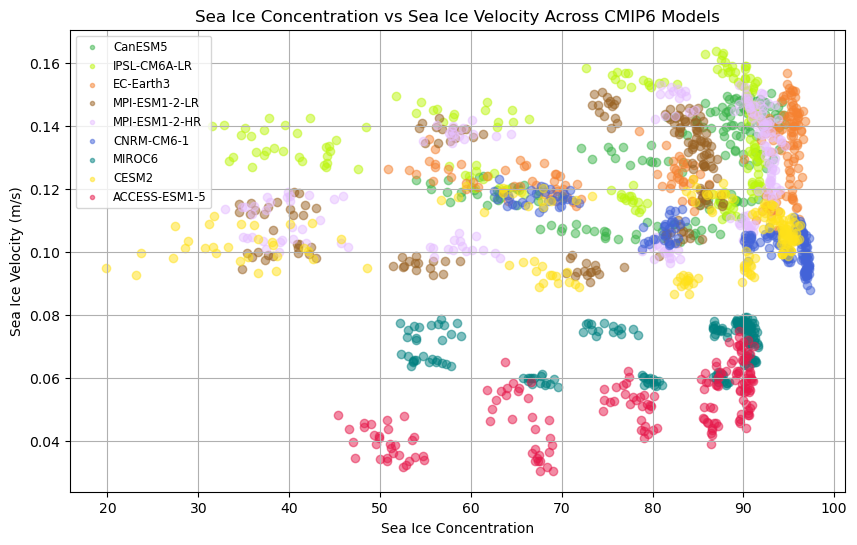

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

conc_folder = "siconc_data/"
sea_ice_folder = "sispeed_data/"

conc_files = sorted(glob.glob(os.path.join(conc_folder, "*_siconc.csv")))
sea_ice_files = sorted(glob.glob(os.path.join(sea_ice_folder, "*_sispeed.area_mean.csv")))

conc_models = {os.path.basename(f).replace("_siconc.csv", ""): f for f in conc_files}
sea_ice_models = {os.path.basename(f).replace("_sispeed.area_mean.csv", ""): f for f in sea_ice_files}

# common models
common_models = set(conc_models.keys()) & set(sea_ice_models.keys())

plt.figure(figsize=(10, 6))

for model in common_models:
    conc_df = pd.read_csv(conc_models[model], index_col="time", parse_dates=True)
    ice_df = pd.read_csv(sea_ice_models[model], index_col="time", parse_dates=True)
 
    common_time = conc_df.index.intersection(ice_df.index)
    conc_df = conc_df.loc[common_time]
    ice_df = ice_df.loc[common_time]

    conc_avg = conc_df.mean(axis=1)
    sea_ice_velocity_avg = ice_df.mean(axis=1)

    if len(conc_avg) != len(sea_ice_velocity_avg):
        print(f"Length mismatch in model {model}: conc={len(conc_avg)}, ice={len(sea_ice_velocity_avg)}")
    
    if sea_ice_velocity_avg.max() < 0.01:
        print(model)

    color = model_colors.get(model, "#000000")
    plt.scatter(conc_avg, sea_ice_velocity_avg, color=color, alpha=0.5, label=model)

plt.xlabel("Sea Ice Concentration")
plt.ylabel("Sea Ice Velocity (m/s)")
plt.title("Sea Ice Concentration vs Sea Ice Velocity Across CMIP6 Models")
plt.legend(loc="best", fontsize="small", markerscale=0.5)
plt.grid(True)
plt.show()


In [41]:
print(os.listdir("siconc_data"))
print(os.listdir("sea_ice_velocity_data"))

['MRI-ESM2-0_siconc.csv', 'MIROC-ES2L_siconc.csv', 'INM-CM5-0_siconc.csv', 'CNRM-CM6-1_siconc.csv', 'IPSL-CM6A-LR_siconc.csv', 'CESM2_siconc.csv', 'MPI-ESM1-2-LR_siconc.csv', 'GISS-E2-1-H_siconc.csv', 'EC-Earth3_siconc.csv', 'CanESM5_siconc.csv', '.ipynb_checkpoints', 'MPI-ESM1-2-HR_siconc.csv', 'NorCPM1_siconc.csv', 'ACCESS-ESM1-5_siconc.csv', 'MIROC6_siconc.csv']
['MPI-ESM1-2-LR_sivel.csv', 'CESM2_sivel.csv', 'GISS-E2-1-H_sivel.csv', 'MPI-ESM1-2-HR_sivel.csv', 'CNRM-CM6-1_sivel.csv', 'CanESM5_sivel.csv', 'IPSL-CM6A-LR_sivel.csv', '.ipynb_checkpoints', 'GISS-E2-1-G_sivel.csv', 'MIROC6_sivel.csv']


In [35]:
print("Current directory:", os.getcwd())


Current directory: /Users/akikomotoki/Documents/Research/sea_ice_variability/Research


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

conc_folder = "siconc_data/"
sea_ice_folder = "sispeed_data/"

conc_files = sorted(glob.glob(os.path.join(conc_folder, "*_siconc.csv")))
sea_ice_files = sorted(glob.glob(os.path.join(sea_ice_folder, "*_sispeed.area_mean.csv")))

conc_models = {os.path.basename(f).replace("_siconc.csv", ""): f for f in conc_files}
sea_ice_models = {os.path.basename(f).replace("_sispeed.area_mean.csv", ""): f for f in sea_ice_files}

common_models = set(conc_models.keys()) & set(sea_ice_models.keys())
print("Common Models:", common_models)

results = []
for model in common_models:
    conc_df = pd.read_csv(conc_models[model], index_col="time", parse_dates=True)
    ice_df  = pd.read_csv(sea_ice_models[model], index_col="time", parse_dates=True)

    common_time = conc_df.index.intersection(ice_df.index)
    if common_time.empty:
        print(f"No common dates for model {model}")
        continue
    
    conc_df = conc_df.loc[common_time]
    ice_df  = ice_df.loc[common_time]

    conc_avg = conc_df.mean(axis=1)
    sea_ice_velocity_avg = ice_df.mean(axis=1)

    if len(conc_avg) != len(sea_ice_velocity_avg):
        print(f"Length mismatch in model {model}: conc={len(conc_avg)}, ice={len(sea_ice_velocity_avg)}")
        continue

    corr_value = conc_avg.corr(sea_ice_velocity_avg)
    
    results.append({"Model": model, "Correlation": corr_value})

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Correlation", ascending=False)

results_df["Correlation"] = results_df["Correlation"].apply(lambda x: f"{x:.3g}")

print("Pearson Correlation between Sea Ice Concentration and Sea Ice Velocity:")
print(results_df)

styled_df = results_df.style.set_properties(**{'text-align': 'center'})\
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center')]},
        {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]}
    ])
from IPython.display import display
display(styled_df)


Common Models: {'MIROC6', 'EC-Earth3', 'MPI-ESM1-2-HR', 'CESM2', 'CanESM5', 'ACCESS-ESM1-5', 'IPSL-CM6A-LR', 'CNRM-CM6-1', 'MPI-ESM1-2-LR'}
Pearson Correlation between Sea Ice Concentration and Sea Ice Velocity:
           Model Correlation
5  ACCESS-ESM1-5       0.651
4        CanESM5       0.556
2  MPI-ESM1-2-HR       0.446
8  MPI-ESM1-2-LR       0.435
1      EC-Earth3        0.38
0         MIROC6       0.199
3          CESM2       0.128
6   IPSL-CM6A-LR      0.0824
7     CNRM-CM6-1      -0.809


,Model,Correlation
5,ACCESS-ESM1-5,0.651
4,CanESM5,0.556
2,MPI-ESM1-2-HR,0.446
8,MPI-ESM1-2-LR,0.435
1,EC-Earth3,0.38
0,MIROC6,0.199
3,CESM2,0.128
6,IPSL-CM6A-LR,0.0824
7,CNRM-CM6-1,-0.809


Available times in ds_sel:
['2000-01-16T12:00:00.000000000' '2000-02-15T12:00:00.000000000'
 '2000-03-16T12:00:00.000000000' '2000-04-16T00:00:00.000000000'
 '2000-05-16T12:00:00.000000000' '2000-06-16T00:00:00.000000000'
 '2000-07-16T12:00:00.000000000' '2000-08-16T12:00:00.000000000'
 '2000-09-16T00:00:00.000000000' '2000-10-16T12:00:00.000000000'
 '2000-11-16T00:00:00.000000000' '2000-12-16T12:00:00.000000000']
sispeed min: nan
sispeed max: nan
sispeed shape: (294, 362)
Number of points (flattened): 106428


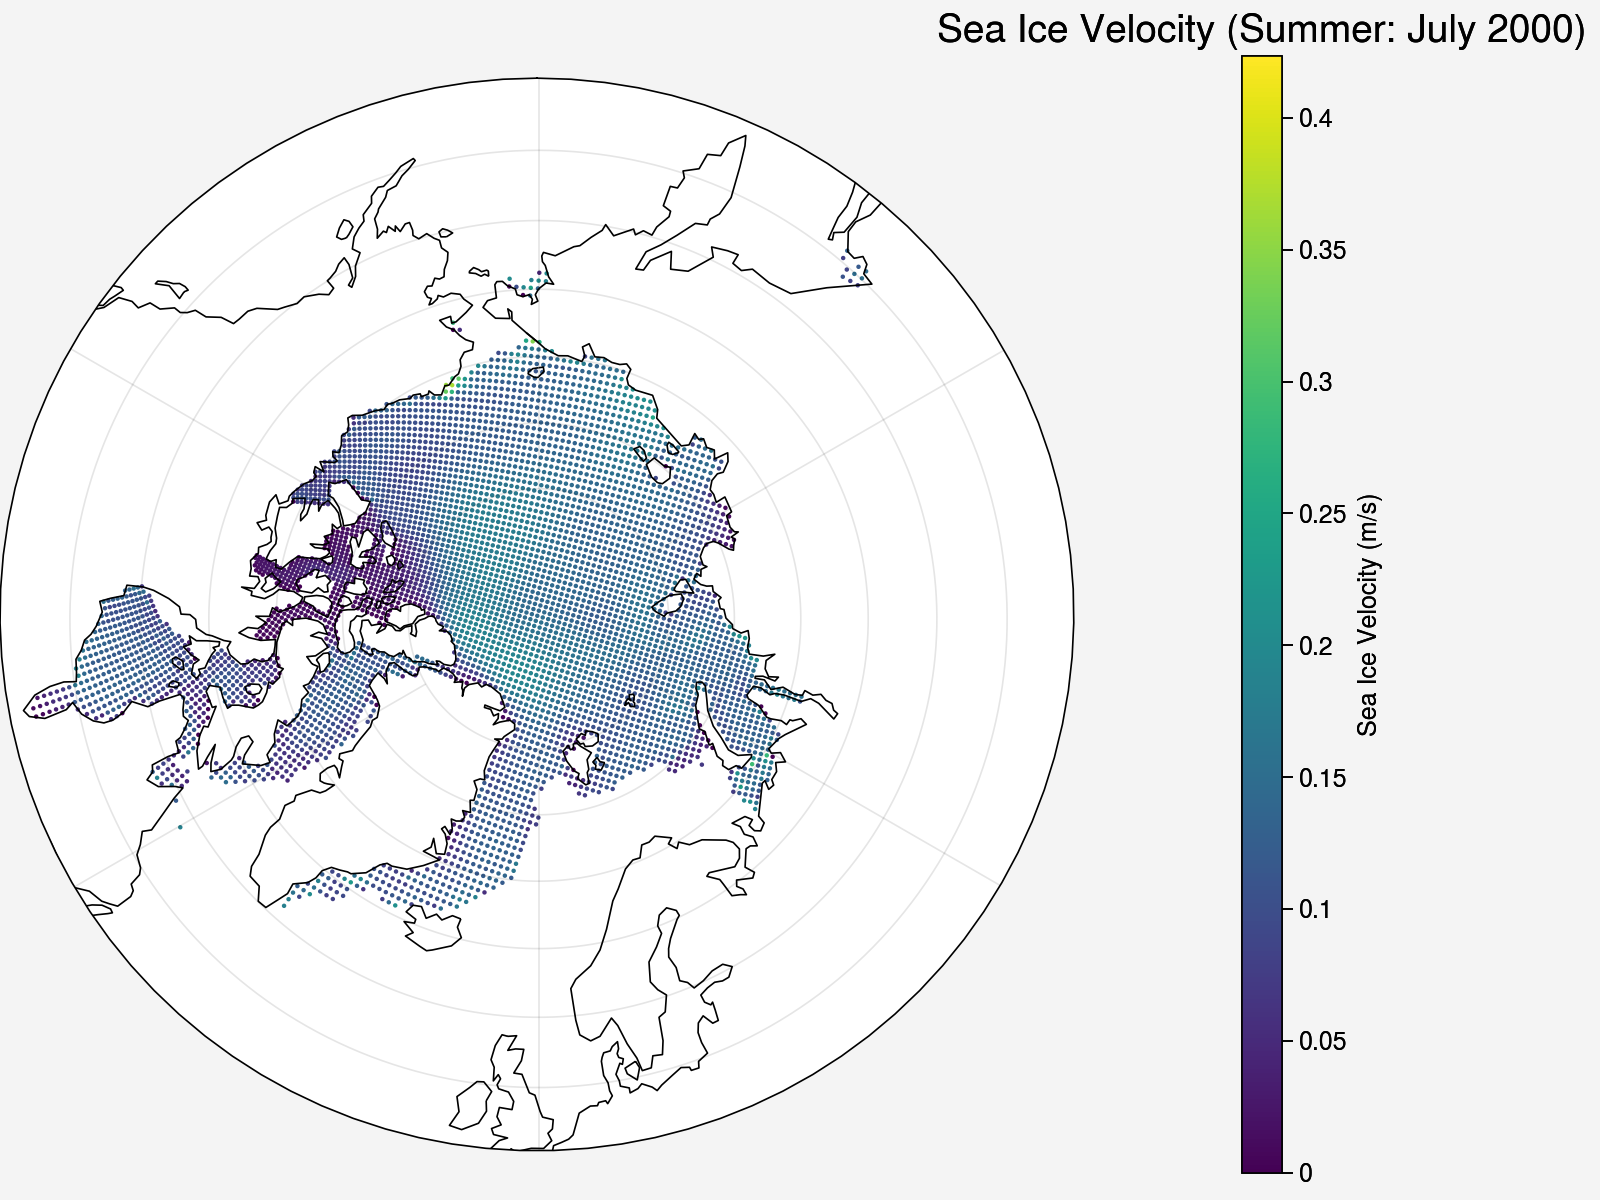

In [43]:
import proplot as pplt
import matplotlib.pyplot as plt
import numpy as np

print("Available times in ds_sel:")
print(ds_sel.time.values)

ds_summer = ds_sel.sel(time=slice("2000-07-01", "2000-07-31")).mean(dim="time", keep_attrs=True).compute()

if ds_summer['sispeed'].size == 0:
    print("selected period has no data in sispeed")
else:
    s_data = ds_summer['sispeed'].data
    print("sispeed min:", float(s_data.min()))
    print("sispeed max:", float(s_data.max()))
    print("sispeed shape:", s_data.shape)
    print("Number of points (flattened):", np.ravel(s_data).size)
    
    fig, ax = pplt.subplots(proj='npstere', figsize=(8, 6))
    
    ax.format(boundinglat=50, coast=True)
    lt = np.ravel(ds_summer['lat'].data)
    ln = np.ravel(ds_summer['lon'].data)

    s = np.ravel(s_data)
    sc = ax.scatter(ln, lt, c=s, ms=1, cmap='viridis')
    plt.colorbar(sc, label="Sea Ice Velocity (m/s)")
    
    plt.title(f"Sea Ice Velocity (Summer: July 2000)", fontsize=14)
    plt.show()


Available times in ds_sel:
['2000-01-16T12:00:00.000000000' '2000-02-15T12:00:00.000000000'
 '2000-03-16T12:00:00.000000000' '2000-04-16T00:00:00.000000000'
 '2000-05-16T12:00:00.000000000' '2000-06-16T00:00:00.000000000'
 '2000-07-16T12:00:00.000000000' '2000-08-16T12:00:00.000000000'
 '2000-09-16T00:00:00.000000000' '2000-10-16T12:00:00.000000000'
 '2000-11-16T00:00:00.000000000' '2000-12-16T12:00:00.000000000']
sispeed min: nan
sispeed max: nan
sispeed shape: (294, 362)
Number of points (flattened): 106428


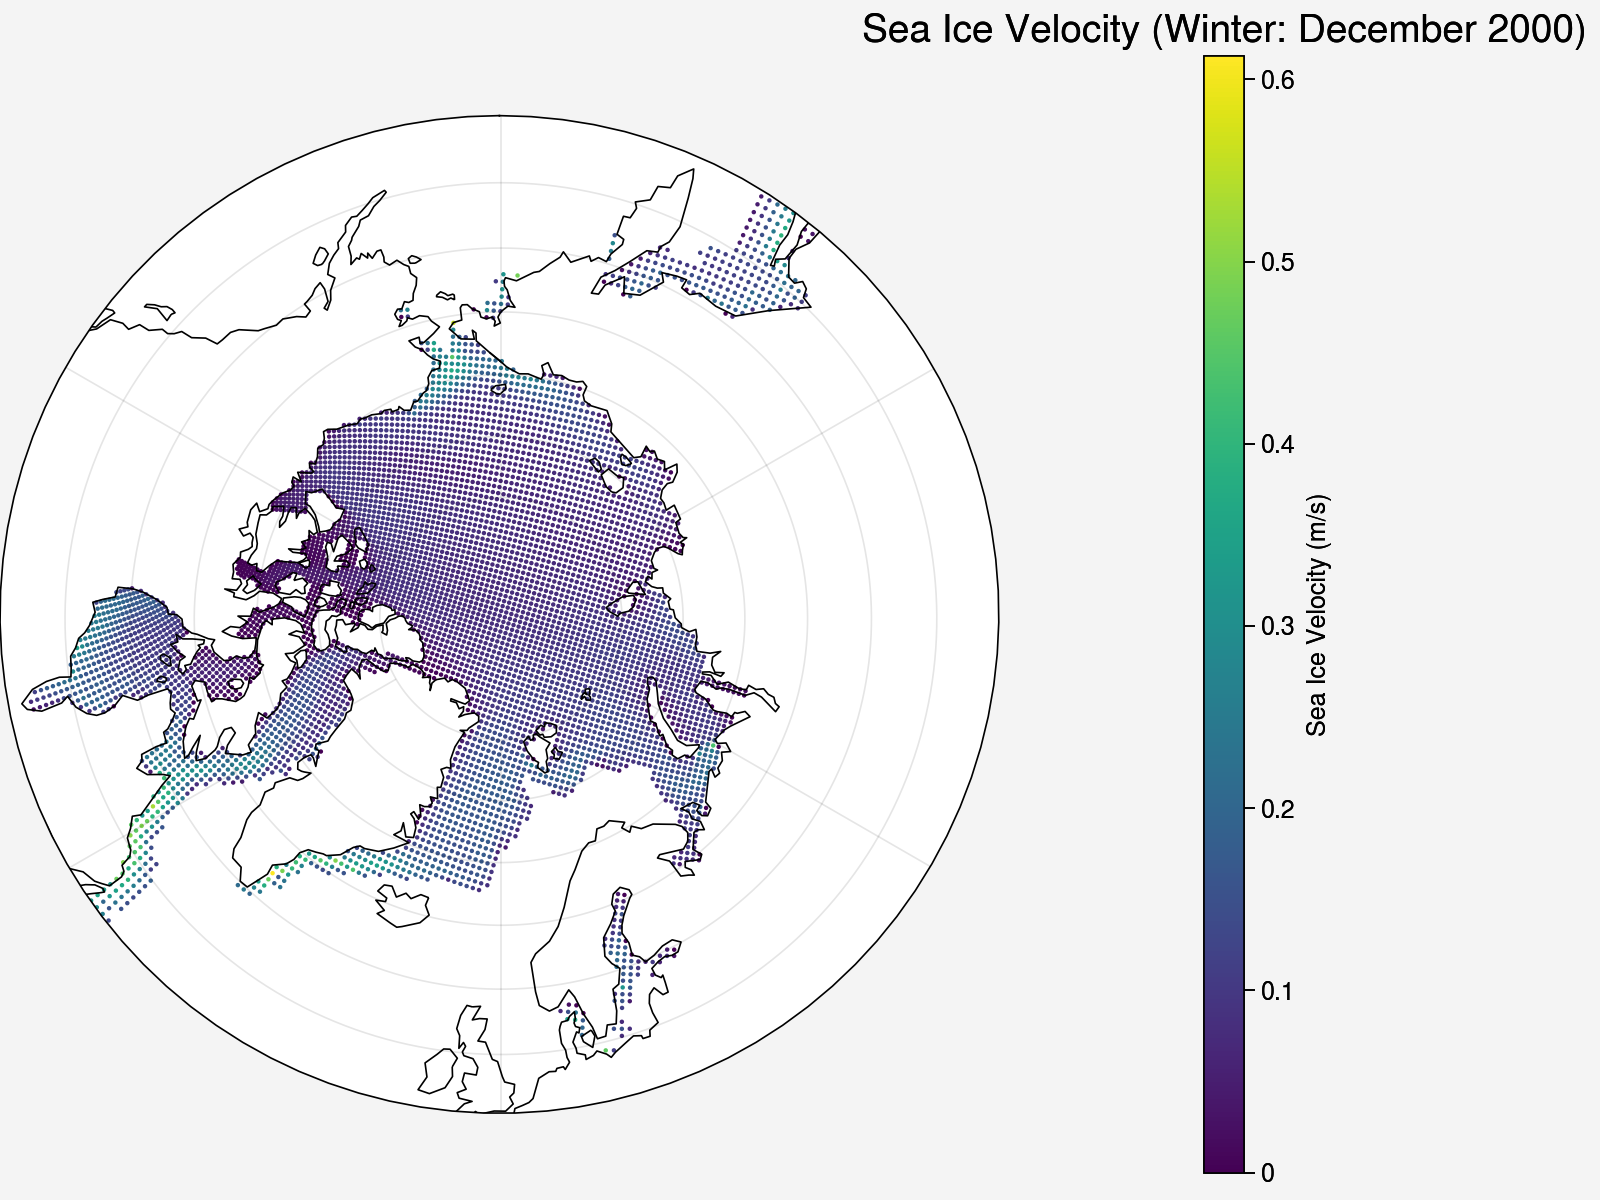

In [41]:
import proplot as pplt
import matplotlib.pyplot as plt
import numpy as np

# Debug: Print available times in ds_sel
print("Available times in ds_sel:")
print(ds_sel.time.values)

# ----------------------------------------------------------------------
# Attempt to select a summer period (e.g., July 2000)
# We'll average over July 2000 to get a robust field.
ds_summer = ds_sel.sel(time=slice("2000-12-01", "2000-12-31")).mean(dim="time", keep_attrs=True).compute()

# Check if the selection is non-empty.
if ds_summer['sispeed'].size == 0:
    print("Warning: The selected summer period (July 2000) has no data in the 'sispeed' variable.")
else:
    # Debug prints: check range and shape.
    s_data = ds_summer['sispeed'].data
    print("sispeed min:", float(s_data.min()))
    print("sispeed max:", float(s_data.max()))
    print("sispeed shape:", s_data.shape)
    print("Number of points (flattened):", np.ravel(s_data).size)
    
    # ----------------------------------------------------------------------
    # Create the North Polar Stereographic plot using Proplot.
    # ----------------------------------------------------------------------
    fig, ax = pplt.subplots(proj='npstere', figsize=(8, 6))
    
    # Format the plot: restrict to latitudes above 50 and add coastlines.
    ax.format(boundinglat=50, coast=True)
    
    # Extract 2D latitude and longitude arrays from the summer data.
    lt = np.ravel(ds_summer['lat'].data)
    ln = np.ravel(ds_summer['lon'].data)
    
    # Extract and flatten the sea ice velocity data for the selected summer period.
    s = np.ravel(s_data)
    
    # Create the scatter plot, where point colors reflect sea ice velocity.
    sc = ax.scatter(ln, lt, c=s, ms=1, cmap='viridis')
    plt.colorbar(sc, label="Sea Ice Velocity (m/s)")
    
    plt.title(f"Sea Ice Velocity (Winter: December 2000)", fontsize=14)
    plt.show()


Common Models: {'MIROC6', 'EC-Earth3', 'MPI-ESM1-2-HR', 'CESM2', 'CanESM5', 'ACCESS-ESM1-5', 'UKESM1-0-LL', 'IPSL-CM6A-LR', 'CNRM-CM6-1', 'MPI-ESM1-2-LR'}
No common dates for model UKESM1-0-LL


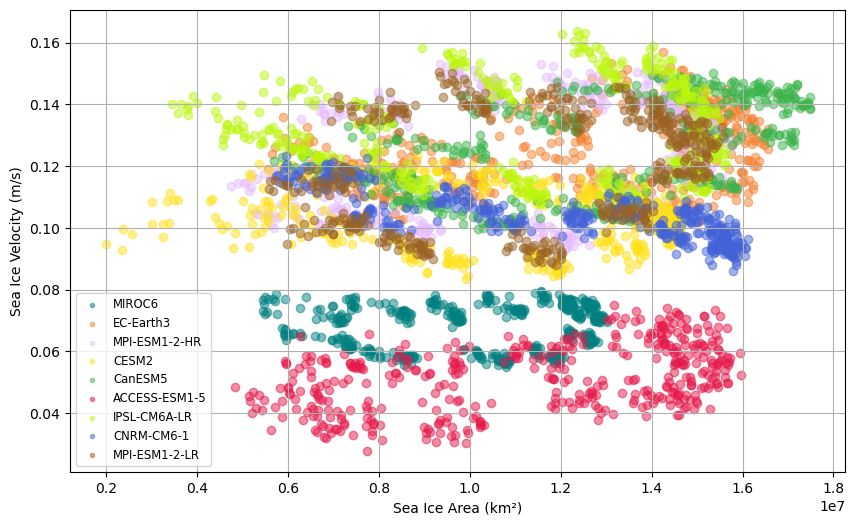

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

conc_folder = "siarea_data/"
sea_ice_folder = "sispeed_data/"

conc_files = sorted(glob.glob(os.path.join(conc_folder, "cmip6.historical.*.siarea.csv")))
sea_ice_files = sorted(glob.glob(os.path.join(sea_ice_folder, "*_sispeed.area_mean.csv")))

conc_models = {os.path.basename(f).replace("cmip6.historical.", "").replace(".siarea.csv", ""): f 
               for f in conc_files}
sea_ice_models = {os.path.basename(f).replace("_sispeed.area_mean.csv", ""): f 
                  for f in sea_ice_files}

common_models = set(conc_models.keys()) & set(sea_ice_models.keys())
print("Common Models:", common_models)

unique_colors = [
    '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
    '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff',
    '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1',
    '#000075', '#808080', '#ffffff', '#000000'
]
model_list = [
    "ACCESS-ESM1-5", "CanESM5", "CESM2", "CNRM-CM6-1", "EC-Earth3",
    "GISS-E2-1-G", "GISS-E2-1-H", "INM-CM5-0", "IPSL-CM6A-LR",
    "MIROC-ES2L", "MIROC6", "MPI-ESM1-2-HR", "MPI-ESM1-2-LR",
    "MRI-ESM2-0", "NorCPM1", "UKESM1-0-LL"
]
model_colors = {model: unique_colors[i % len(unique_colors)] for i, model in enumerate(model_list)}

plt.figure(figsize=(10, 6))

for model in common_models:
    try:
        conc_df = pd.read_csv(conc_models[model], index_col="time", parse_dates=True)
    except ValueError:
        conc_df = pd.read_csv(conc_models[model], index_col=0, parse_dates=True)
    try:
        ice_df = pd.read_csv(sea_ice_models[model], index_col="time", parse_dates=True)
    except ValueError:
        ice_df = pd.read_csv(sea_ice_models[model], index_col=0, parse_dates=True)
 
    common_time = conc_df.index.intersection(ice_df.index)
    if common_time.empty:
        print(f"No common dates for model {model}")
        continue
    conc_df = conc_df.loc[common_time]
    conc_df = conc_df / 1e6
    ice_df = ice_df.loc[common_time]

    # ensemble averages (averaging across columns).
    conc_avg = conc_df.mean(axis=1)
    sea_ice_velocity_avg = ice_df.mean(axis=1)

    if len(conc_avg) != len(sea_ice_velocity_avg):
        print(f"Length mismatch in model {model}: conc={len(conc_avg)}, ice={len(sea_ice_velocity_avg)}")
    
    if sea_ice_velocity_avg.max() < 0.01:
        print(f"Low sea ice velocity in model: {model}")

    color = model_colors.get(model, "#000000")
    plt.scatter(conc_avg, sea_ice_velocity_avg, color=color, alpha=0.5, label=model)

plt.xlabel("Sea Ice Area (km²)")
plt.ylabel("Sea Ice Velocity (m/s)")
# plt.title("Sea Ice Concentration vs Sea Ice Velocity Across CMIP6 Models")
plt.legend(loc="best", fontsize="small", markerscale=0.5)
plt.grid(True)

plt.savefig("sea_ice_concentration_vs_velocity.png", dpi=300, bbox_inches="tight")
plt.show()


No common dates for model UKESM1-0-LL


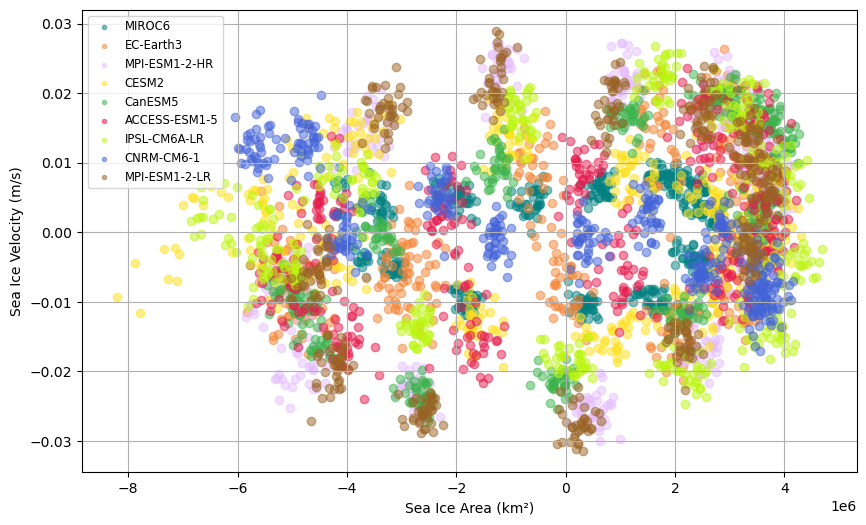

In [12]:
unique_colors = [
    '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
    '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff',
    '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1',
    '#000075', '#808080', '#ffffff', '#000000'
]
model_list = [
    "ACCESS-ESM1-5", "CanESM5", "CESM2", "CNRM-CM6-1", "EC-Earth3",
    "GISS-E2-1-G", "GISS-E2-1-H", "INM-CM5-0", "IPSL-CM6A-LR",
    "MIROC-ES2L", "MIROC6", "MPI-ESM1-2-HR", "MPI-ESM1-2-LR",
    "MRI-ESM2-0", "NorCPM1", "UKESM1-0-LL"
]
model_colors = {model: unique_colors[i % len(unique_colors)] for i, model in enumerate(model_list)}

plt.figure(figsize=(10, 6))

for model in common_models:
    try:
        conc_df = pd.read_csv(conc_models[model], index_col="time", parse_dates=True)
    except ValueError:
        conc_df = pd.read_csv(conc_models[model], index_col=0, parse_dates=True)
    try:
        ice_df = pd.read_csv(sea_ice_models[model], index_col="time", parse_dates=True)
    except ValueError:
        ice_df = pd.read_csv(sea_ice_models[model], index_col=0, parse_dates=True)

    common_time = conc_df.index.intersection(ice_df.index)
    if common_time.empty:
        print(f"No common dates for model {model}")
        continue
    conc_df = conc_df.loc[common_time]
    ice_df = ice_df.loc[common_time]
    
    conc_df = conc_df / 1e6
    
    conc_avg = conc_df.mean(axis=1)
    sea_ice_velocity_avg = ice_df.mean(axis=1)
    
    detrended_conc = signal.detrend(conc_avg.values)
    detrended_vel  = signal.detrend(sea_ice_velocity_avg.values)
    
    color = model_colors.get(model, "#000000")
    plt.scatter(detrended_conc, detrended_vel, color=color, alpha=0.5, label=model)

plt.xlabel("Sea Ice Area (km²)")
plt.ylabel("Sea Ice Velocity (m/s)")
# plt.title("Detrended Sea Ice Area vs Sea Ice Velocity Across CMIP6 Models")
plt.legend(loc="best", fontsize="small", markerscale=0.5)
plt.grid(True)

In [14]:
results = []
for model in common_models:
    try:
        conc_df = pd.read_csv(conc_models[model], index_col="time", parse_dates=True)
    except ValueError:
        conc_df = pd.read_csv(conc_models[model], index_col=0, parse_dates=True)
        
    try:
        ice_df = pd.read_csv(sea_ice_models[model], index_col="time", parse_dates=True)
    except ValueError:
        ice_df = pd.read_csv(sea_ice_models[model], index_col=0, parse_dates=True)
    
    common_time = conc_df.index.intersection(ice_df.index)
    if common_time.empty:
        print(f"No common dates for model {model}")
        continue
    
    conc_df = conc_df.loc[common_time]
    ice_df = ice_df.loc[common_time]
    
    conc_avg = conc_df.mean(axis=1)
    sea_ice_velocity_avg = ice_df.mean(axis=1)
    
    if len(conc_avg) != len(sea_ice_velocity_avg):
        print(f"Length mismatch in model {model}: conc={len(conc_avg)}, ice={len(sea_ice_velocity_avg)}")
        continue

    corr_value = conc_avg.corr(sea_ice_velocity_avg)
    results.append({"Model": model, "Correlation": corr_value})

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Correlation", ascending=False)

results_df["Correlation"] = results_df["Correlation"].apply(lambda x: f"{x:.3g}")

print("Pearson Correlation between Sea Ice Concentration and Sea Ice Velocity:")
print(results_df)

styled_df = results_df.style.set_properties(**{'text-align': 'center'}) \
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center')]},
        {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]}
    ])
from IPython.display import display
display(styled_df)


No common dates for model UKESM1-0-LL
Pearson Correlation between Sea Ice Concentration and Sea Ice Velocity:
           Model Correlation
4        CanESM5       0.531
5  ACCESS-ESM1-5       0.451
1      EC-Earth3        0.32
8  MPI-ESM1-2-LR       0.257
2  MPI-ESM1-2-HR       0.249
0         MIROC6      0.0589
6   IPSL-CM6A-LR      0.0111
3          CESM2      -0.164
7     CNRM-CM6-1      -0.791


,Model,Correlation
4,CanESM5,0.531
5,ACCESS-ESM1-5,0.451
1,EC-Earth3,0.32
8,MPI-ESM1-2-LR,0.257
2,MPI-ESM1-2-HR,0.249
0,MIROC6,0.0589
6,IPSL-CM6A-LR,0.0111
3,CESM2,-0.164
7,CNRM-CM6-1,-0.791


In [15]:
conc_folder = "siarea_data/"
sea_ice_folder = "sispeed_data/"

conc_files = sorted(glob.glob(os.path.join(conc_folder, "cmip6.historical.*.siarea.csv")))
sea_ice_files = sorted(glob.glob(os.path.join(sea_ice_folder, "*_sispeed.area_mean.csv")))

conc_models = {
    os.path.basename(f).replace("cmip6.historical.", "").replace(".siarea.csv", ""): f
    for f in conc_files
}
sea_ice_models = {
    os.path.basename(f).replace("_sispeed.area_mean.csv", ""): f
    for f in sea_ice_files
}

common_models = set(conc_models.keys()) & set(sea_ice_models.keys())
print("Common Models:", common_models)

results = []
for model in common_models:
    try:
        conc_df = pd.read_csv(conc_models[model], index_col="time", parse_dates=True)
    except ValueError:
        conc_df = pd.read_csv(conc_models[model], index_col=0, parse_dates=True)
    try:
        ice_df = pd.read_csv(sea_ice_models[model], index_col="time", parse_dates=True)
    except ValueError:
        ice_df = pd.read_csv(sea_ice_models[model], index_col=0, parse_dates=True)
    
    common_time = conc_df.index.intersection(ice_df.index)
    if common_time.empty:
        print(f"No common dates for model {model}")
        continue
    
    conc_df = conc_df.loc[common_time]
    ice_df = ice_df.loc[common_time]

    conc_avg = conc_df.mean(axis=1)
    ice_avg  = ice_df.mean(axis=1)

    detrended_conc = signal.detrend(conc_avg.values)
    detrended_ice  = signal.detrend(ice_avg.values)

    corr = np.corrcoef(detrended_conc, detrended_ice)[0, 1]
    results.append({"Model": model, "Detrended_Correlation": corr})

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Detrended_Correlation", ascending=False)

results_df["Detrended_Correlation"] = results_df["Detrended_Correlation"].apply(lambda x: f"{x:.3g}")

print("Pearson Correlation between Detrended Sea Ice Area and Sea Ice Velocity:")
print(results_df)

styled_df = results_df.style.set_properties(**{'text-align': 'center'})\
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center')]},
        {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]}
    ])

from IPython.display import display
display(styled_df)


Common Models: {'MIROC6', 'EC-Earth3', 'MPI-ESM1-2-HR', 'CESM2', 'CanESM5', 'ACCESS-ESM1-5', 'UKESM1-0-LL', 'IPSL-CM6A-LR', 'CNRM-CM6-1', 'MPI-ESM1-2-LR'}
No common dates for model UKESM1-0-LL
Pearson Correlation between Detrended Sea Ice Area and Sea Ice Velocity:
           Model Detrended_Correlation
4        CanESM5                 0.582
5  ACCESS-ESM1-5                 0.452
1      EC-Earth3                 0.425
8  MPI-ESM1-2-LR                 0.269
2  MPI-ESM1-2-HR                 0.264
0         MIROC6                0.0905
6   IPSL-CM6A-LR                 0.049
3          CESM2                 -0.15
7     CNRM-CM6-1                 -0.79


,Model,Detrended_Correlation
4,CanESM5,0.582
5,ACCESS-ESM1-5,0.452
1,EC-Earth3,0.425
8,MPI-ESM1-2-LR,0.269
2,MPI-ESM1-2-HR,0.264
0,MIROC6,0.0905
6,IPSL-CM6A-LR,0.049
3,CESM2,-0.15
7,CNRM-CM6-1,-0.79
